/media/psf/Home/dev/arima-pge/eval_arima.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Processing date :  20160605
Processing date :  20160629
Processing date :  20160711
Processing date :  20160723
Processing date :  20160804
Processing date :  20160816
Processing date :  20160828
Processing date :  20160909
Processing date :  20160921
Processing date :  20161003
Processing date :  20161015
Processing date :  20161027
Processing date :  20161108
Processing date :  20161120
Processing date :  20161202
Processing date :  20161214
Processing date :  20161226
Processing date :  20170107
Processing date :  20170119
Processing date :  20170131
Processing date :  20170212
Processing date :  20170224
Processing date :  20170308
Processing date :  20170320
Processing date :  20170401
Processing date :  20170413
Processing date :  20170425
Processing date :  20170507
Processing date :  20170519
Processing date :  20170706
Processing date :  20170718
Processing date :  20170730
Processing date :  20170811
Processing date :  20170823
Processing date :  20170904
Processing date :  2

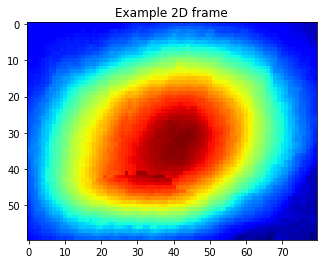

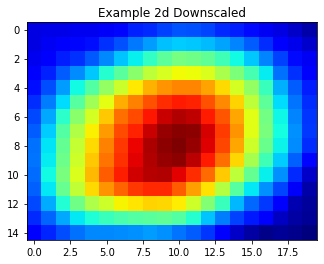

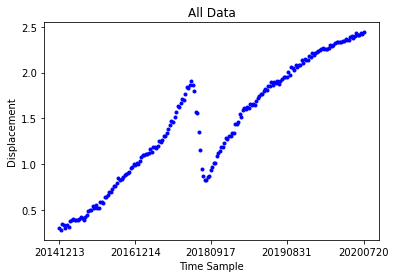

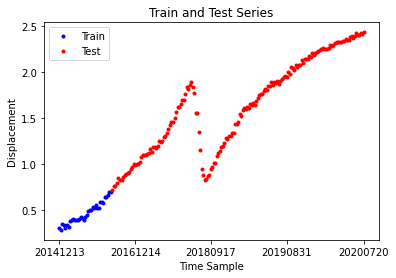

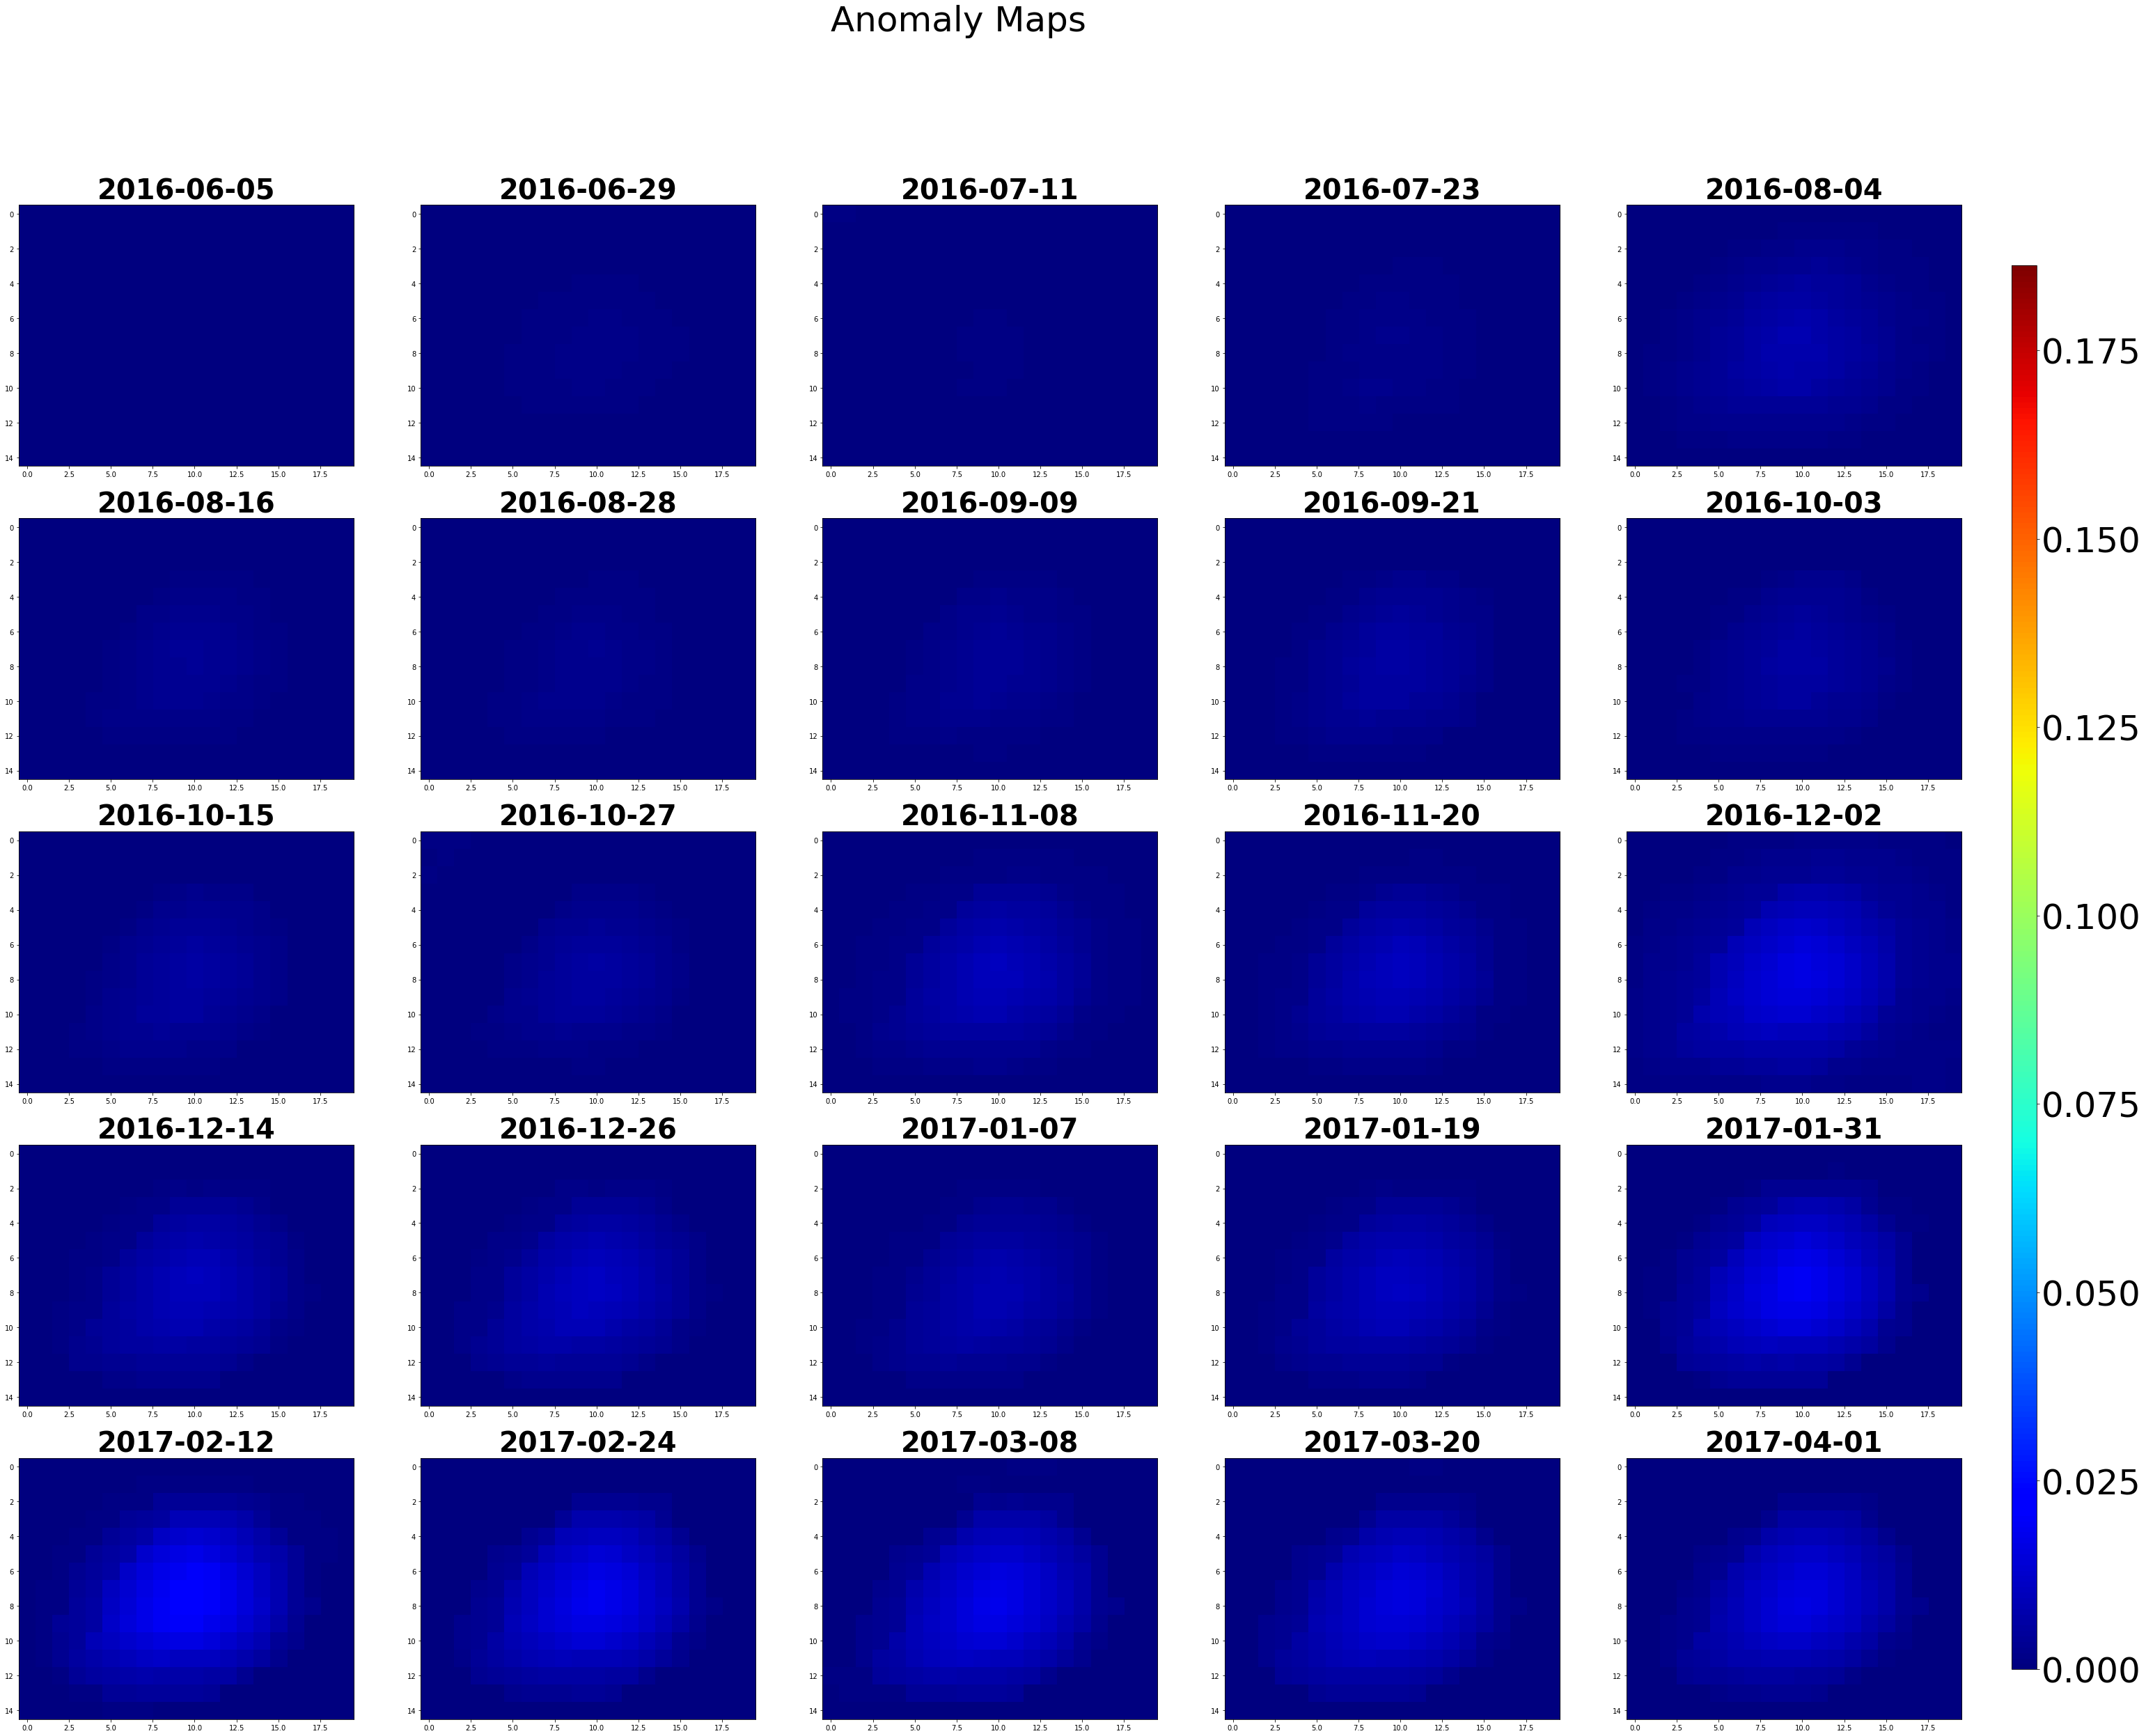

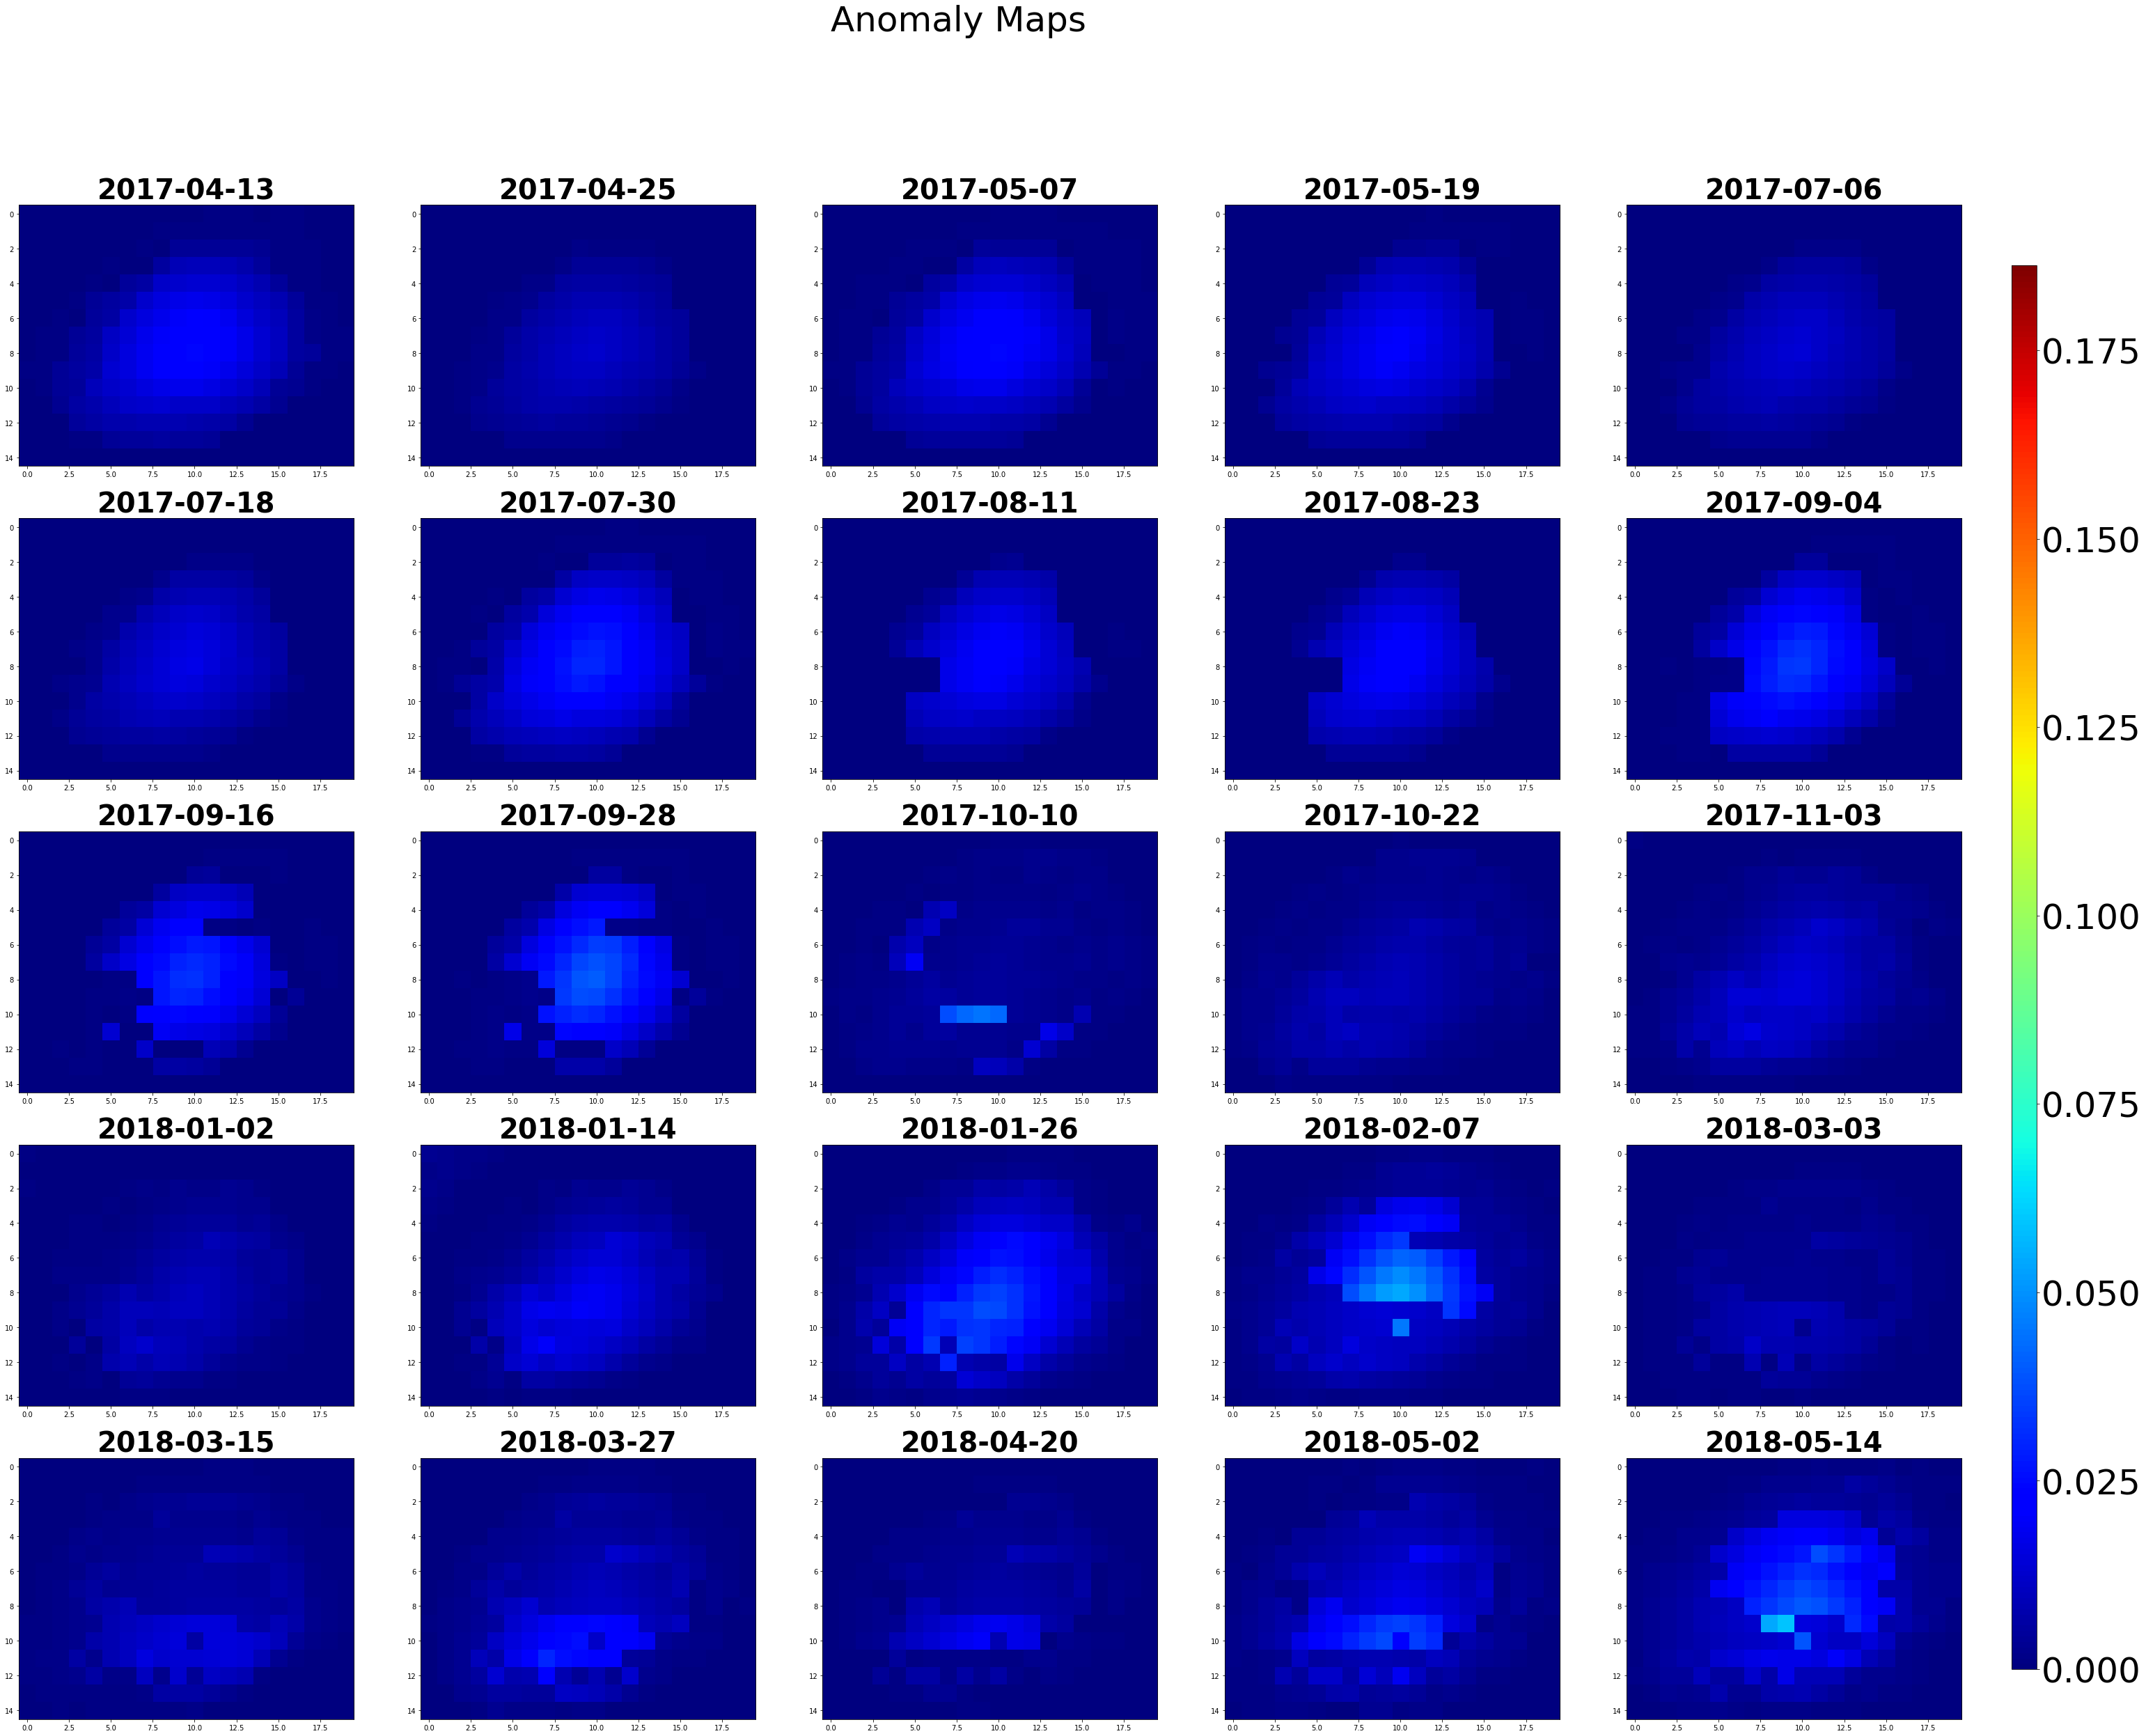

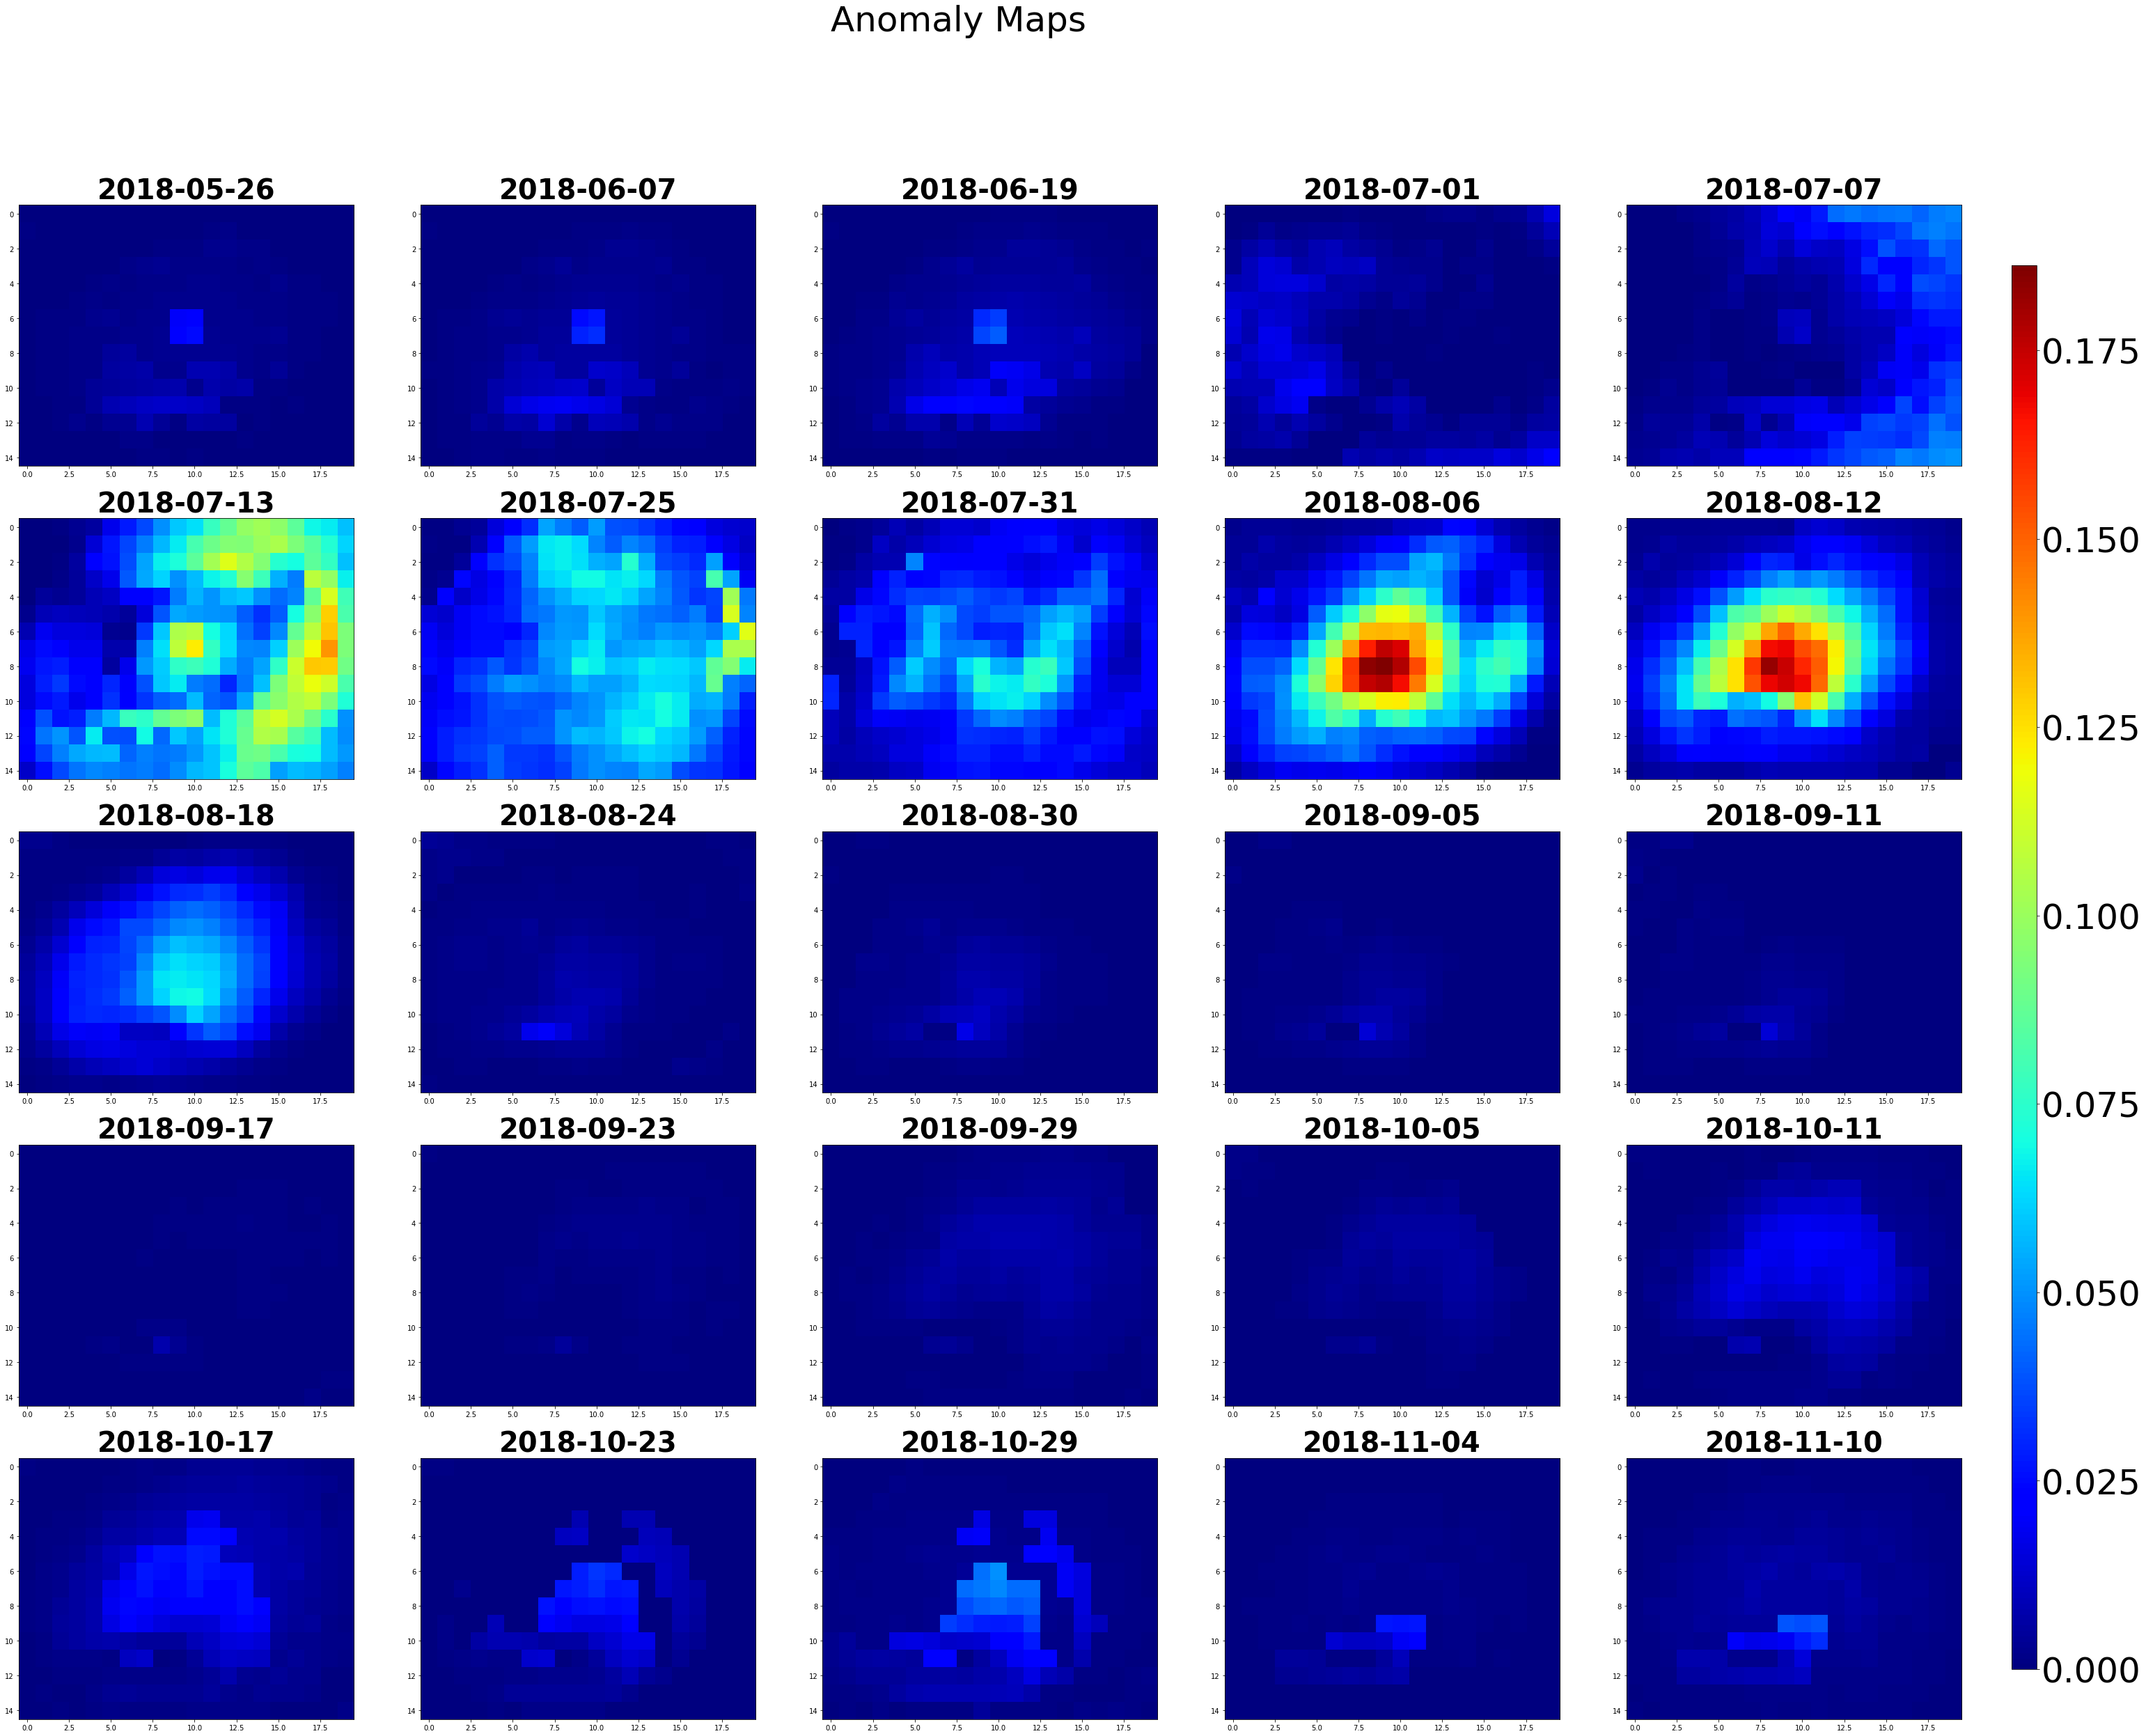

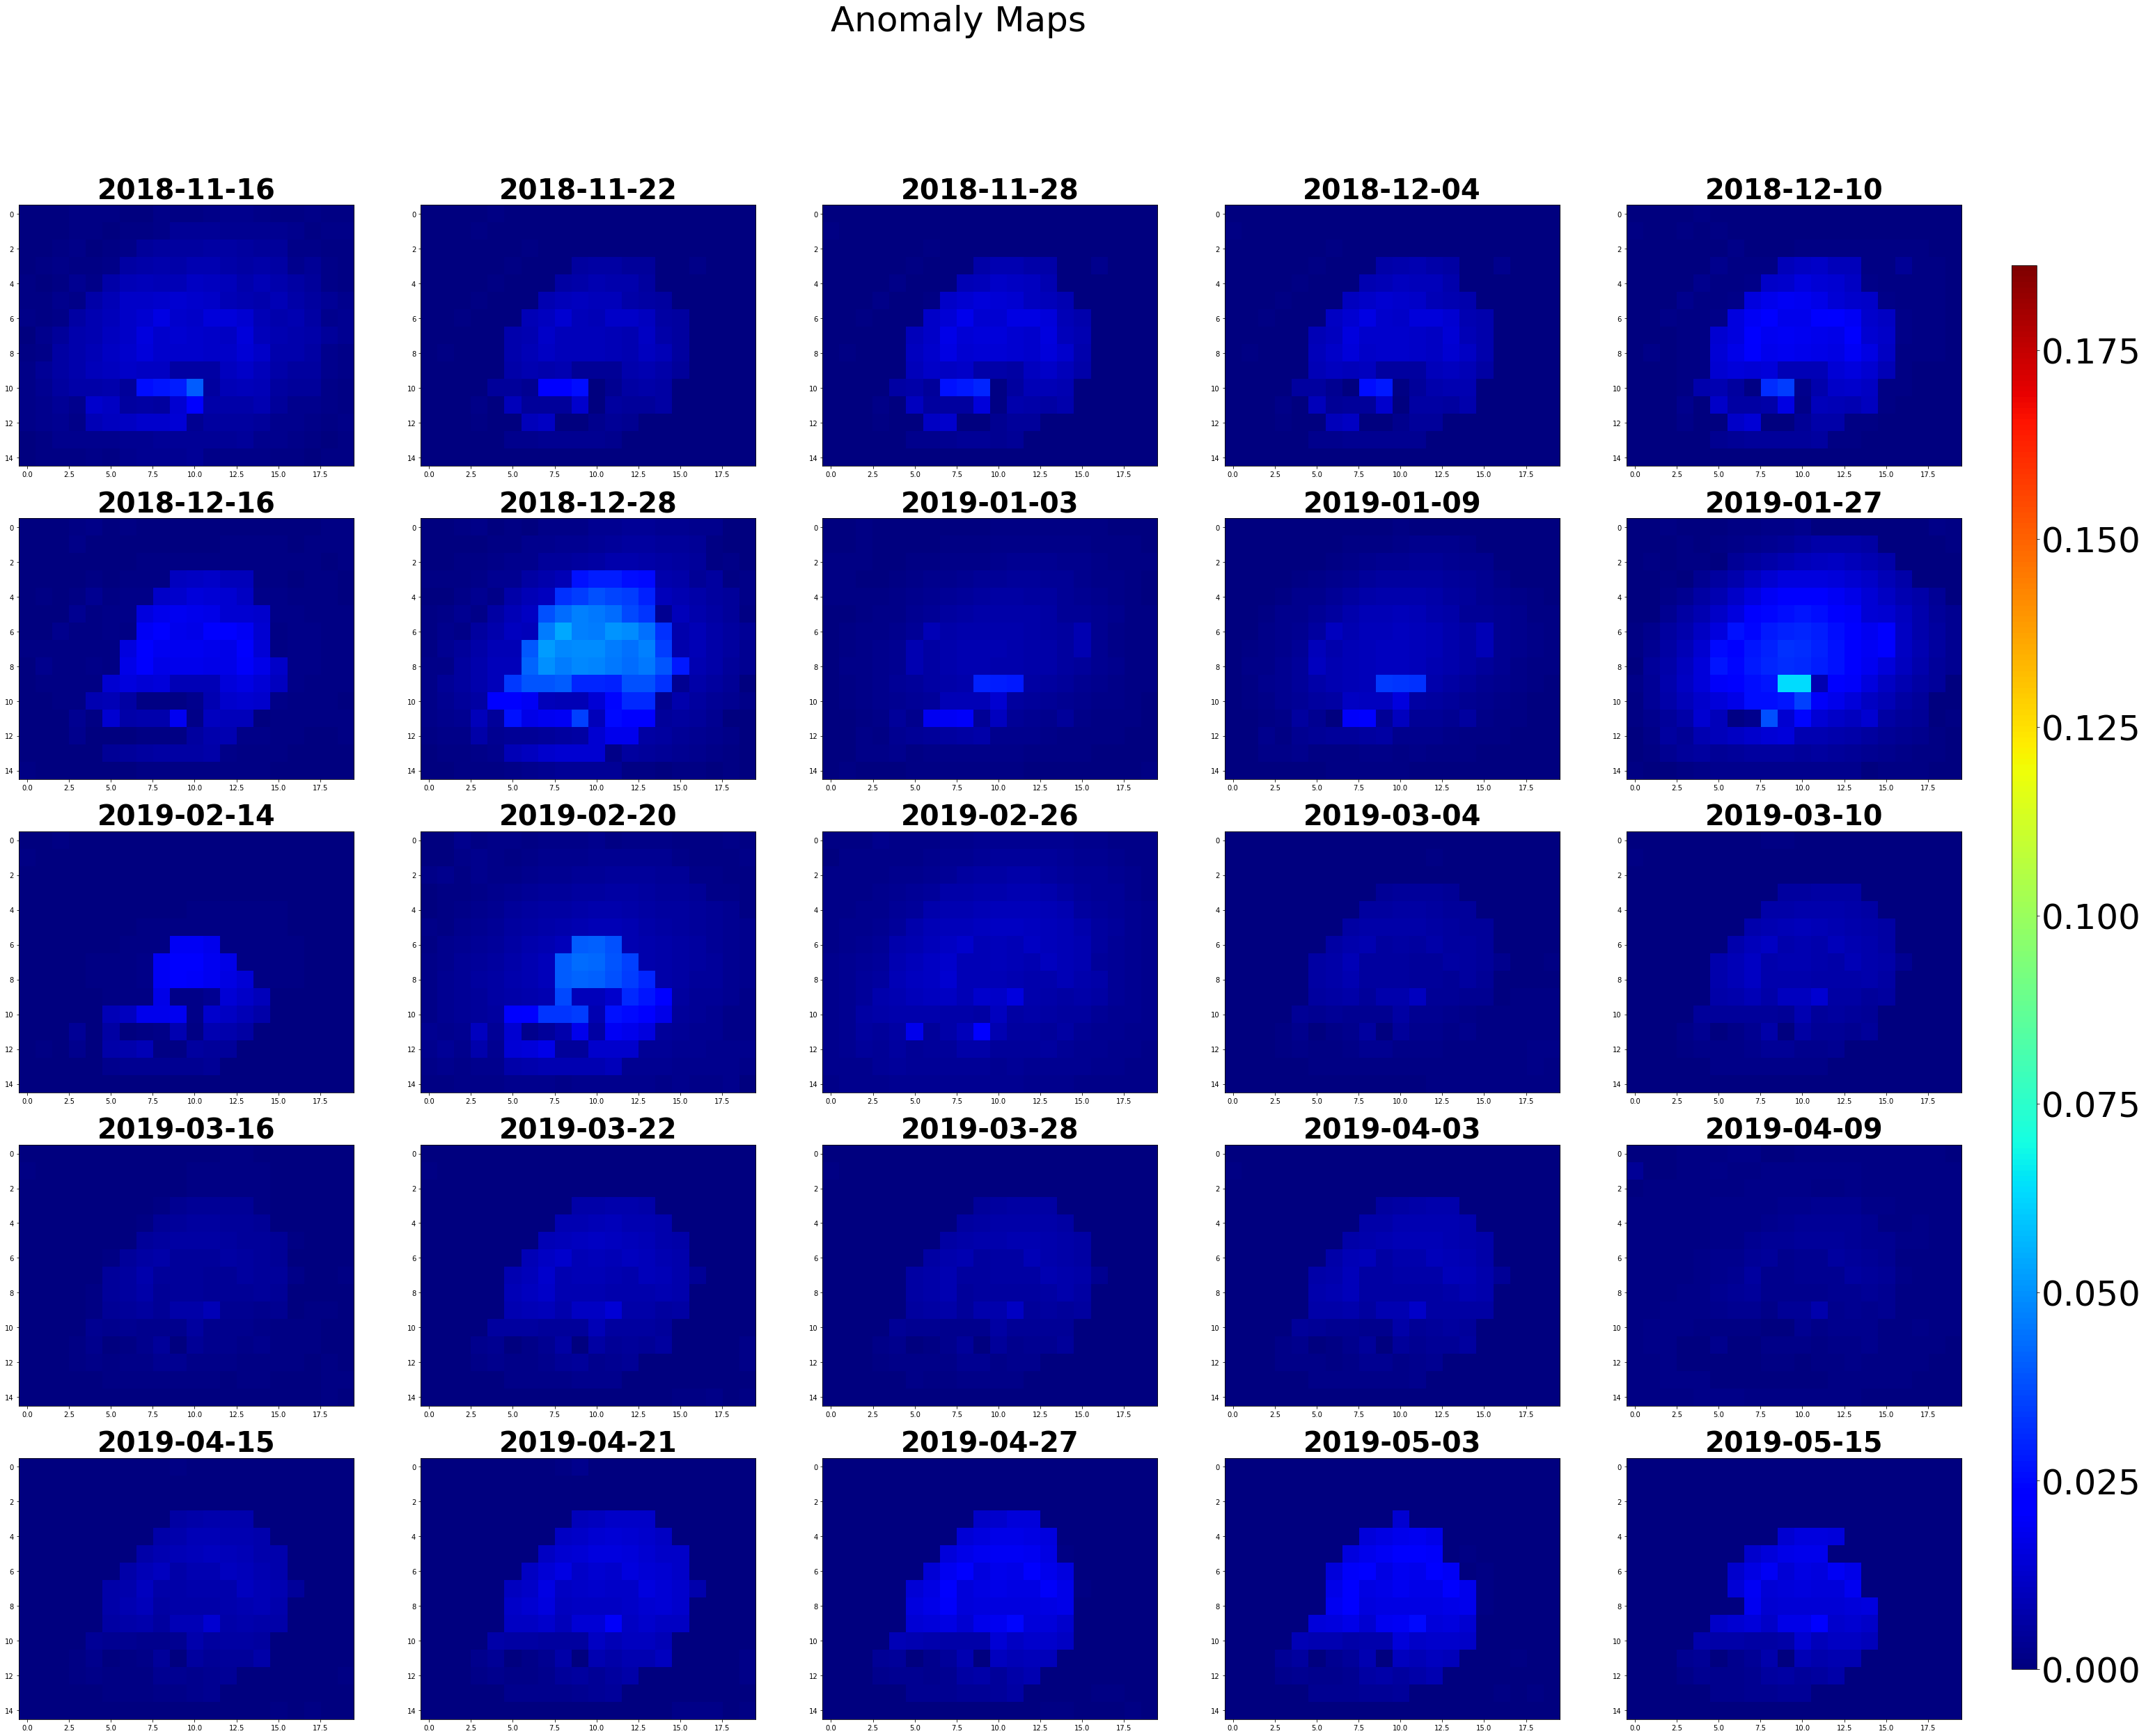

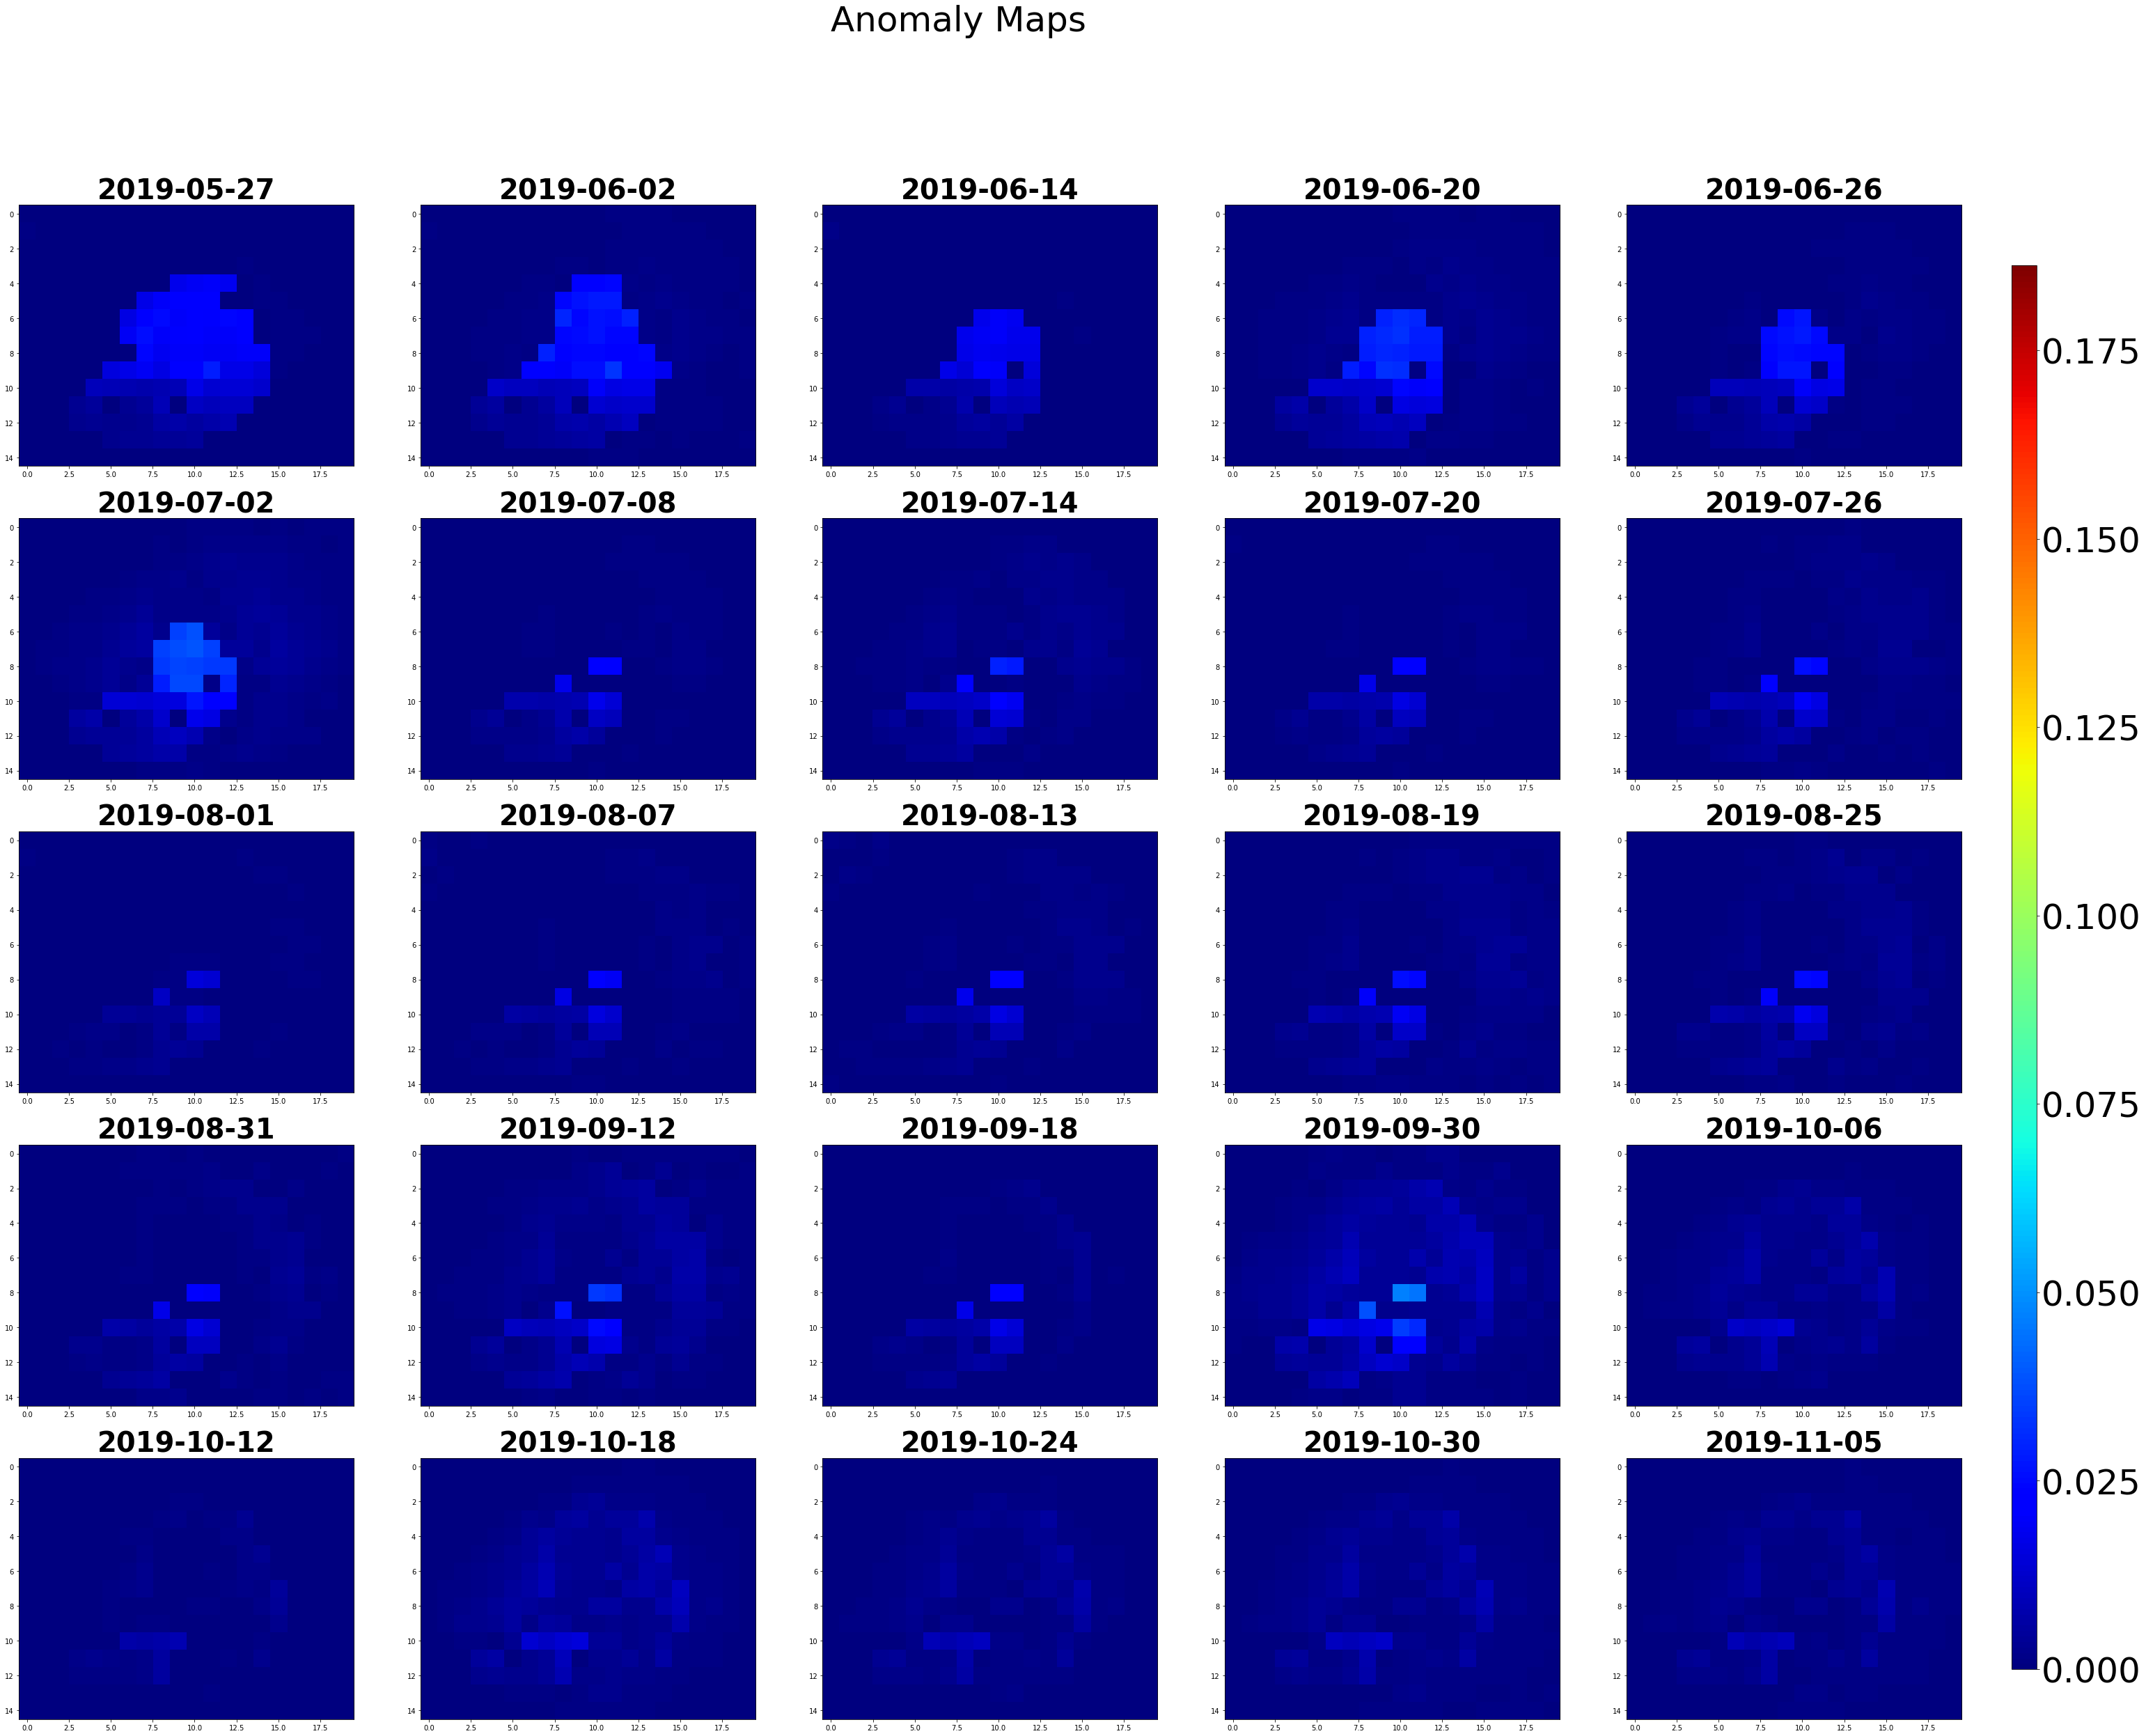

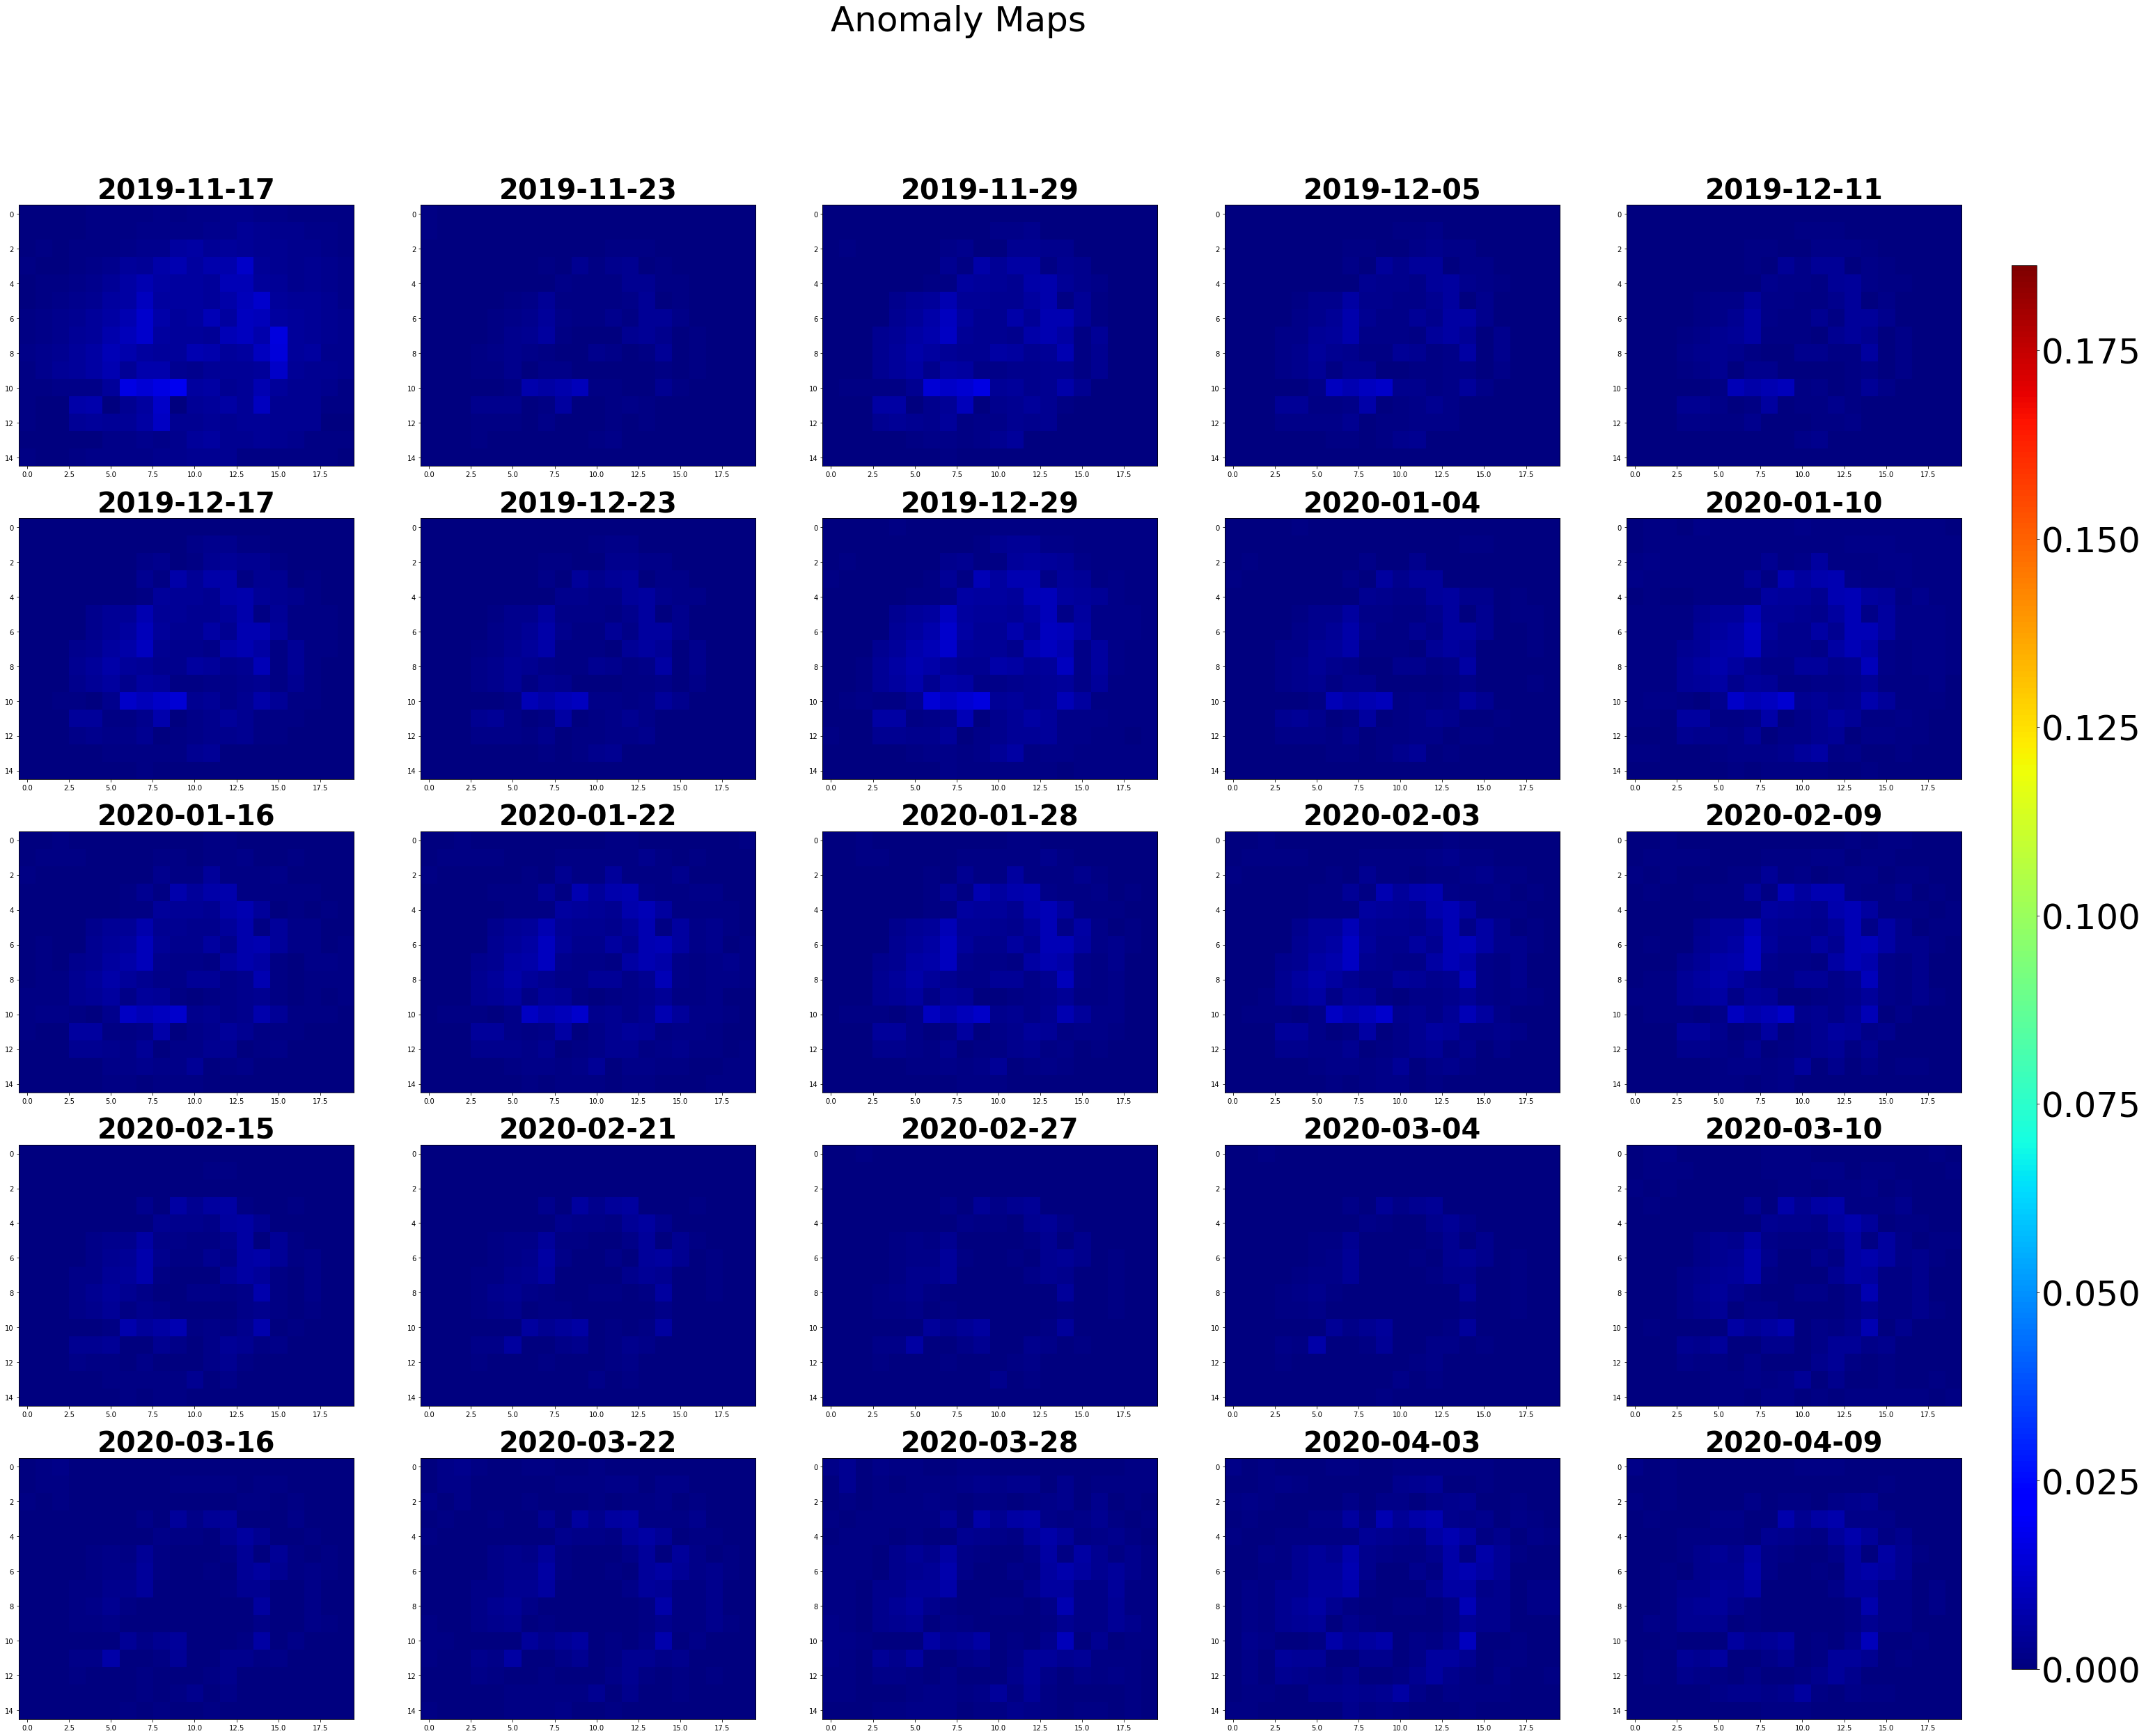

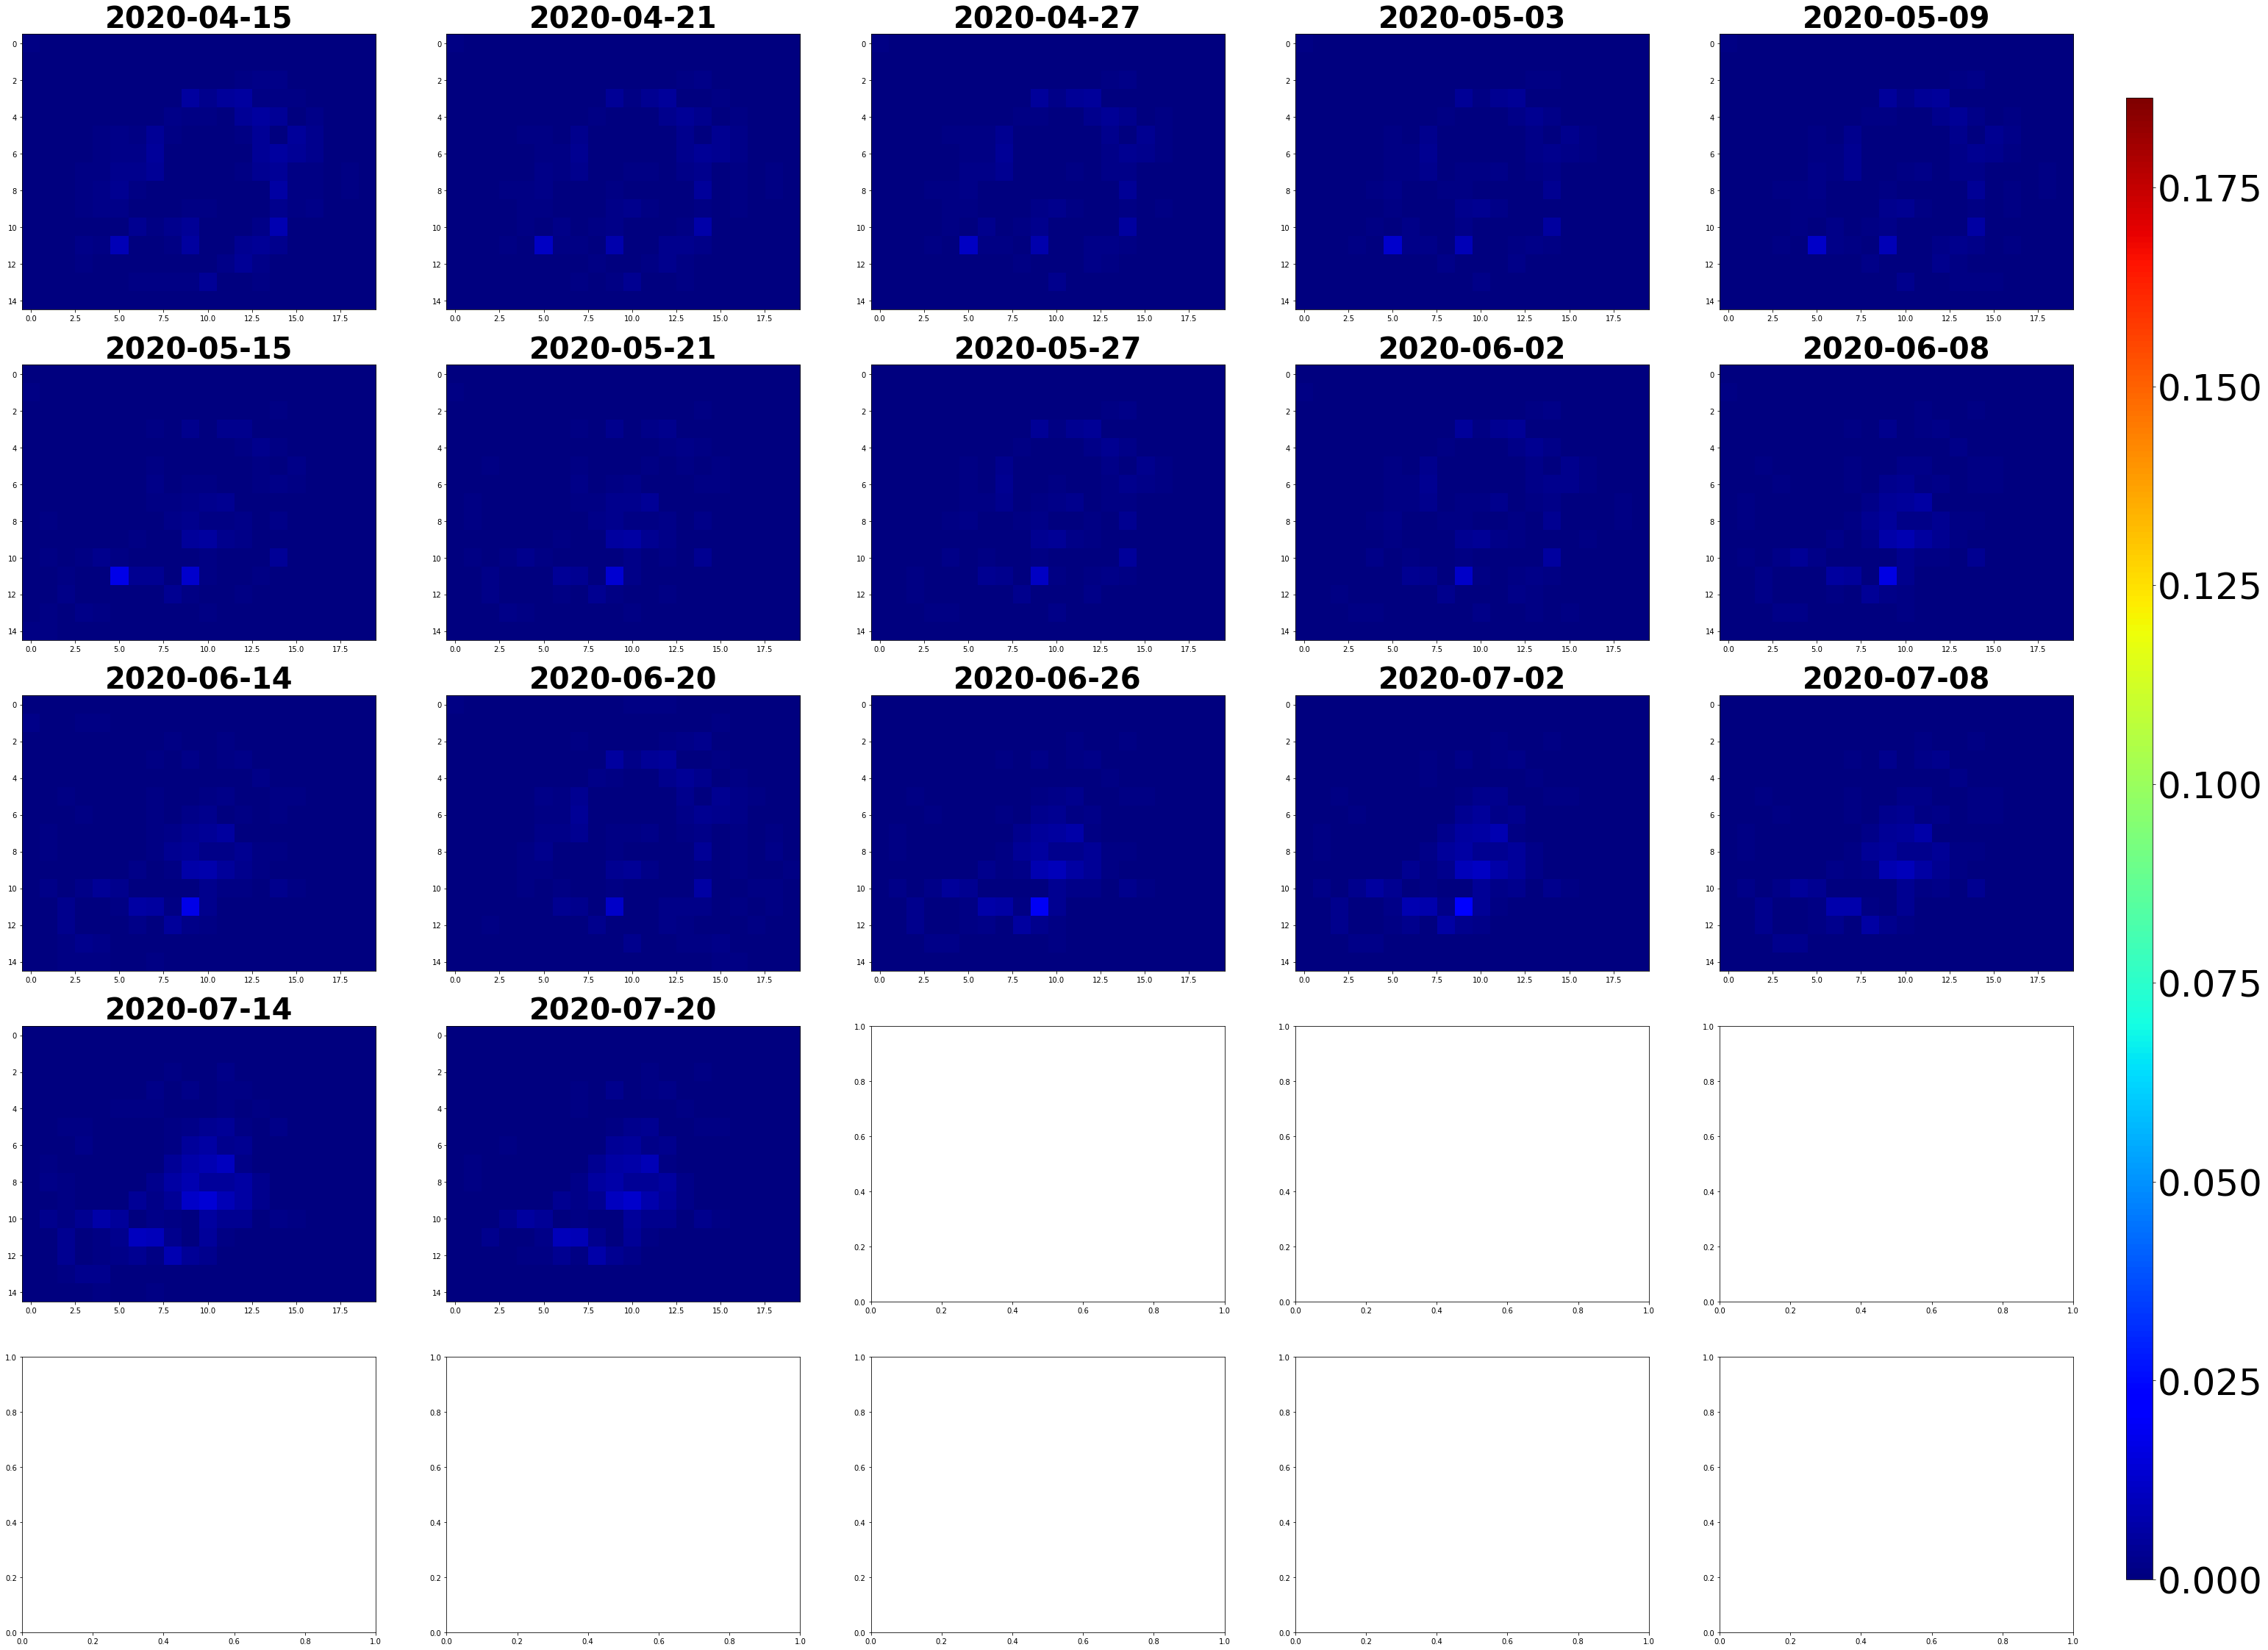

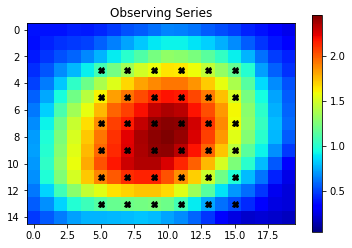

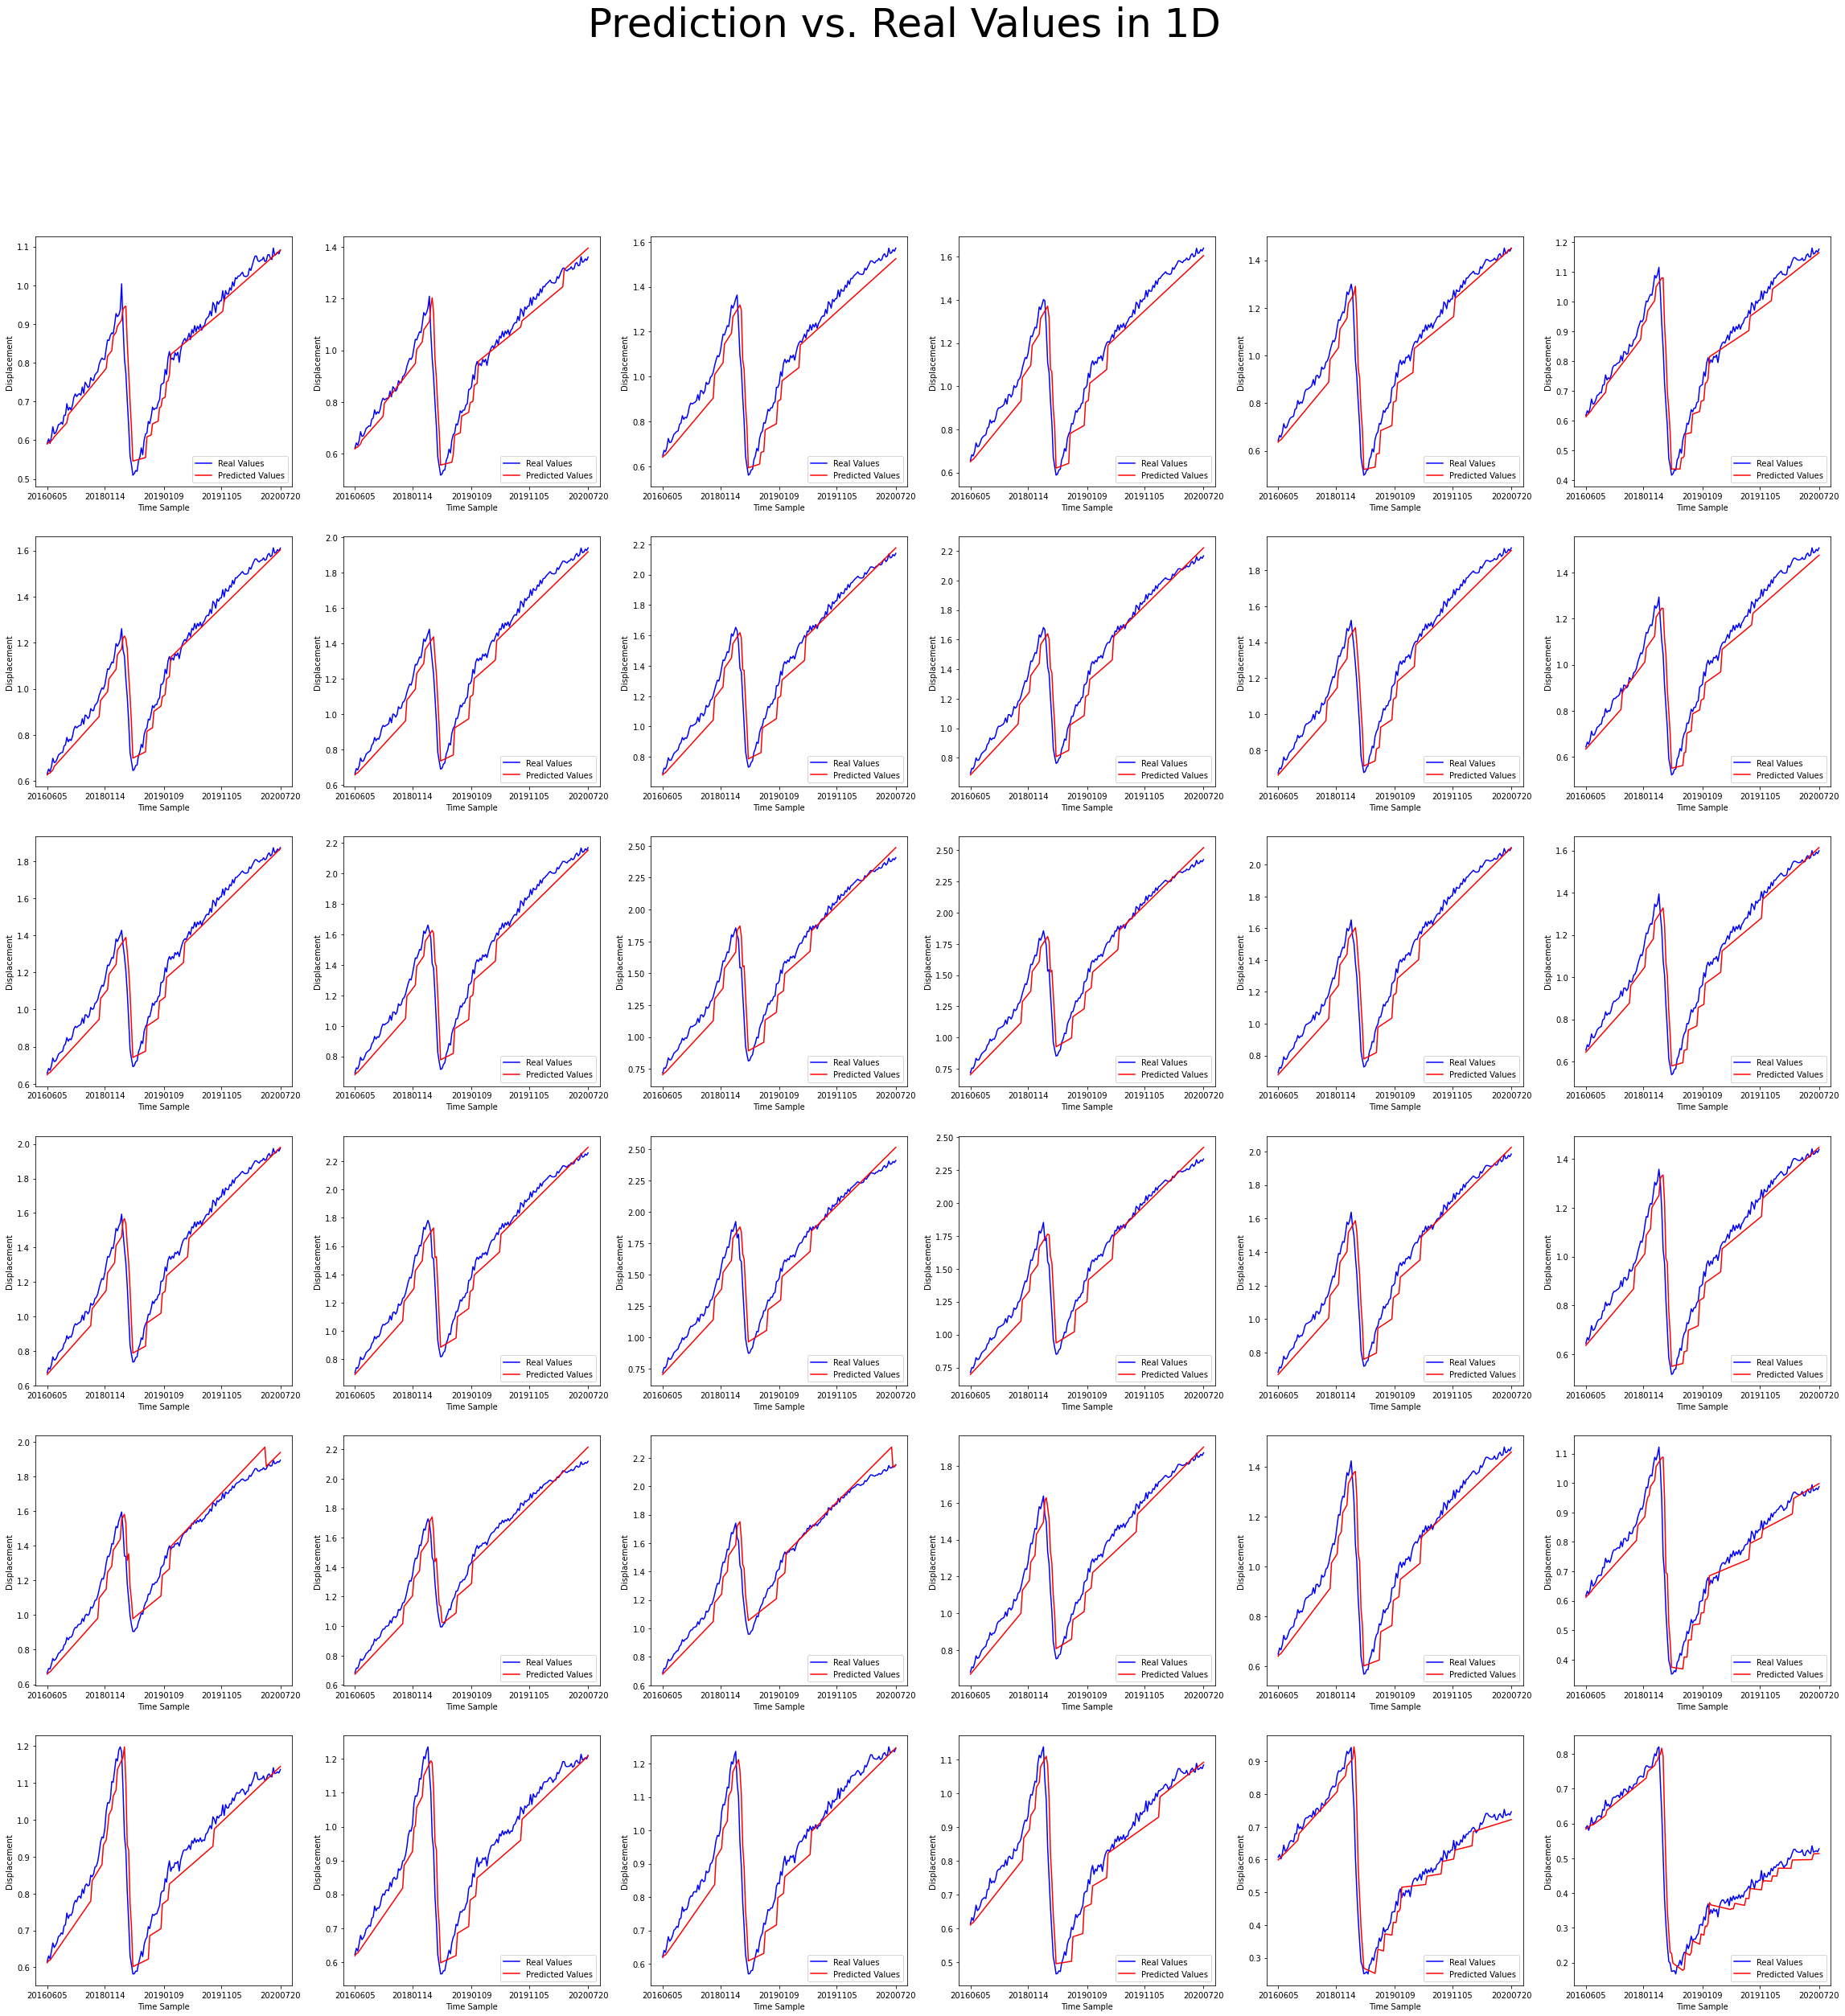

In [1]:
from arima import arima_process
from hashlib import md5


def generate_id(id_prefix: str, context_filename: str, track_number: int, sensing_end: datetime, orbit_direction: str):
    direction_char = orbit_direction.upper()[0]

    with open(context_filename) as context_file:
        hash_suffix = md5(context_file.read().encode()).hexdigest()[0:5]

    job_id = f'{id_prefix}-{direction_char}{track_number}-{sensing_end.strftime("%Y%m%d")}-{hash_suffix}'
    print(f'Generated job ID: {job_id}')
    return job_id

filepath = 'examples/timeseries_demErr.h5'
# ranges for cropping roi (volcano-specific)
yrange, x_range = (1365, 1425), (640, 720)
# index to split train and test series (volcano-specific)
split_idx = 35
# scaling factor for resizing the ROI (downsampling)
scale_factor = 4
# Considers 'n_mse' first mse's as 'normal_mse'
n_mse = 10

# model parameters for each pixel. If not provided, code automatically runs grid search to find the best parameters
# model_params.p contains the values pre-computed for Sierra Negra; this would need to be re-computed for other volcanoes.
model_params = 'model_params.p'

arima_process = arima_process(filepath, yrange, x_range, split_idx, scale_factor, n_mse, model_params)
arima_process.train_and_predict()